In [246]:
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import cv2
from random import randint

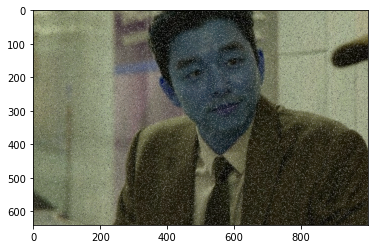

In [253]:
img = cv2.imread('mr_squad_game.jpg')
rows, cols, _= img.shape
for i in range(99999):
    x = random.randint(0, rows-1)
    y = random.randint(0, cols-1)
    noise_color = random.randint(0, 255)
    img[x, y] = noise_color
    
plt.imshow(img, cmap="gray")



In [66]:
background_img = cv2.imread('img/street_snow.jpg')
snows = []
s_size = random.randint(1, 10)
for i in range(3):
    snow_img = cv2.imread('img/snow.png', -1)
    small_snow = cv2.resize(snow_img, (s_size , s_size))
    snows.append(small_snow)

In [252]:
i_m_g = cv.imread("mr_squad_game.jpg")
face_detector = MTCNN()

In [154]:
def draw_keypoints (image, final_points):
    img = image
    plt.imshow(img)
    ax = plt.gca()
    for point in final_points:
        x, y, w, h = point['box']
        square_face = plt.Rectangle((x, y), w, h, fill=False, color='orange')
        ax.add_patch(square_face)
        for key, value in point['keypoints'].items():
            dot = plt.Circle(value, radius=2, color='red')
            ax.add_patch(dot)
    plt.show("out_put", img)

In [155]:
final_points = face_detector.detect_faces(i_m_g)

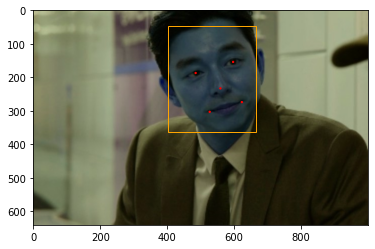

In [156]:
draw_keypoints(i_m_g, final_points)

In [157]:
def EuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

In [158]:
def alignment_procedure(img, left_eye, right_eye):

    #this function aligns given face in img based on left and right eye coordinates

    left_eye_x, left_eye_y = left_eye
    right_eye_x, right_eye_y = right_eye

    #-----------------------
    #find rotation direction

    if left_eye_y > right_eye_y:
        point_3rd = (right_eye_x, left_eye_y)
        direction = -1 #rotate same direction to clock
    else:
        point_3rd = (left_eye_x, right_eye_y)
        direction = 1 #rotate inverse direction of clock

    #-----------------------
    #find length of triangle edges

    a = EuclideanDistance(np.array(left_eye), np.array(point_3rd))
    b = EuclideanDistance(np.array(right_eye), np.array(point_3rd))
    c = EuclideanDistance(np.array(right_eye), np.array(left_eye))

    #-----------------------

    #apply cosine rule

    if b != 0 and c != 0: #this multiplication causes division by zero in cos_a calculation

        cos_a = (b*b + c*c - a*a)/(2*b*c)
        angle = np.arccos(cos_a) #angle in radian
        angle = (angle * 180) / math.pi #radian to degree

        #-----------------------
        #rotate base image

        if direction == -1:
            angle = 90 - angle

        img = Image.fromarray(img)
        img = np.array(img.rotate(direction * angle))

    #-----------------------

    return img #return img anyway

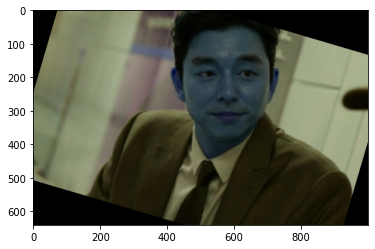

In [159]:
detection = final_points[0]
keypoints = detection["keypoints"]
left_eye = keypoints["left_eye"]
right_eye = keypoints["right_eye"]

img = alignment_procedure(i_m_g, left_eye, right_eye)
plt.imshow(img)